In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\gamal\Downloads\Python Bootcamp For Data Science and ML\Pandas_Project_Session\data\movies\IMDB_Movie_Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.shape

(1000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
#Check Null Values
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [10]:
# displaying columns reveals that some solums are not in the proper way:
# we can modify them using rename() method and convert the title type to lowercase for analysis purpose

In [12]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [13]:
df.rename(columns= {'Runtime (Minutes)': 'Runtime', 'Revenue (Millions)': 'Revenue'}, inplace=True)

In [14]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [15]:
# alternatevely we can use list comprehension method to lowercase the column names
df.columns = [col.lower() for col in df]
df.columns

Index(['rank', 'title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime', 'rating', 'votes', 'revenue', 'metascore'],
      dtype='object')

In [16]:
# Now let's handle missing values 

In [18]:
# We got more than one direction first we can drop the columns contain null values by dropna(axis =1 ) or fill it with mean value with fillna()
revenue = df['revenue']

In [19]:
revenue.fillna(revenue.mean(), inplace=True)

In [20]:
df.isnull().sum()

rank            0
title           0
genre           0
description     0
director        0
actors          0
year            0
runtime         0
rating          0
votes           0
revenue         0
metascore      64
dtype: int64

In [21]:
# in order to work with the other data available; first we need get the minimum details about the data using describe()
# method

In [22]:
df.describe()

,rank,year,runtime,rating,votes,revenue,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [23]:
# we can easily use describe() method on individual column to get the information about that, say for ex:'genre'

In [24]:
df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

In [26]:
df['genre'].value_counts().head(n=30)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Crime,Drama,Mystery           23
Action,Adventure,Drama        18
Action,Crime,Drama            17
Horror,Thriller               16
Drama,Thriller                15
Biography,Drama,History       14
Biography,Drama               14
Adventure,Family,Fantasy      14
Action,Adventure,Comedy       14
Action,Comedy,Crime           12
Action,Crime,Thriller         12
Horror                        11
Action,Adventure,Thriller     11
Crime,Drama                   10
Horror,Mystery,Thriller        9
Action,Thriller                9
Thriller                       9
Biography,Crime,Drama          9
Animation,Action,Adventure     9
Drama,Mystery,Thriller         8
Name: genr

Generate the relationship between each continuous variable using corr() method

In [34]:
# to know the positive and negative relationship between the columns we can use 'corr' method which gives the details 
# about the correlation between the columns in dataframe object

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
corr = df.corr()

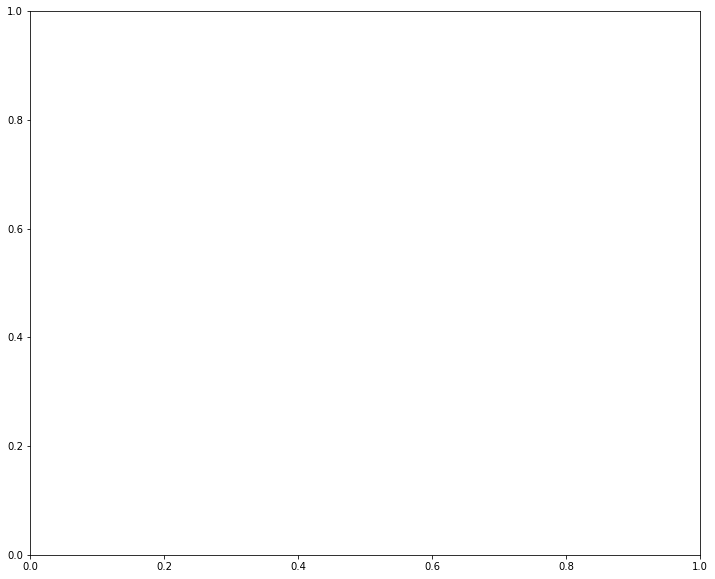

In [38]:
f, ax = plt.subplots(figsize=(12, 10))

In [39]:
mask = np.triu(np.ones_like(corr, dtype=bool))

In [40]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

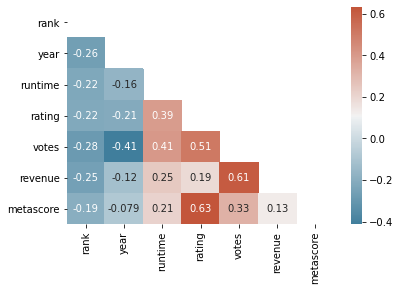

In [41]:
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Find the movies directed by 'James Gunn', & 'Ridley Scott' with the rating greater than or equal to 8.

In [42]:
# Let's use the conditional statements to get the list of films directesd by 'James Gunn' with 'rating' greater than or 
# equal to 8

In [44]:
condition = df[(df['director'] == "James Gunn") & (df['rating'] >= 8.0)]
condition.head()

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


In [45]:
# similarly Let's use the conditional statements to get the list of films directesd by 'Ridley Scott' with 'rating' greater than or 
# equal to 8

In [46]:
condition2 = df[(df['director'] == "Ridley Scott") & (df['rating'] >= 8.0)]
condition2.head()

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0


In [47]:
# display only the films directed by the 'Ridley Scott'

In [49]:
Ridley_data = df[(df.director=='Ridley Scott')]
Ridley_data

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
387,388,Robin Hood,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
470,471,American Gangster,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
516,517,Exodus: Gods and Kings,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
521,522,The Counselor,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
530,531,A Good Year,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
737,738,Body of Lies,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [50]:
type(df[df['rating'] >= 8.0])

pandas.core.frame.DataFrame

Display all the director's who got the rating >= 8 for their movies.

In [57]:
Directors_data = df[(df.rating>=8)]
Directors_data

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.120000,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.690000,69.0
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.500000,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
742,743,El secreto de sus ojos,"Drama,Mystery,Romance",A retired legal counselor writes a novel hopin...,Juan José Campanella,"Ricardo Darín, Soledad Villamil, Pablo Rago,Ca...",2009,129,8.2,144524,20.170000,80.0
765,766,PK,"Comedy,Drama,Romance",A stranger in the city asks questions no one h...,Rajkumar Hirani,"Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...",2014,153,8.2,103279,10.570000,51.0
772,773,How to Train Your Dragon,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Dean DeBlois,"Jay Baruchel, Gerard Butler,Christopher Mintz-...",2010,98,8.1,523893,217.390000,74.0
861,862,Koe no katachi,"Animation,Drama,Romance","The story revolves around Nishimiya Shoko, a g...",Naoko Yamada,"Miyu Irino, Saori Hayami, Aoi Yuki, Kenshô Ono",2016,129,8.4,2421,82.956376,80.0


In [55]:
# top director with highest films having 'rating' greater than or equal to 8

In [56]:
df['director'][df['rating'] >= 8.0].value_counts()

Christopher Nolan    5
Denis Villeneuve     3
Martin Scorsese      3
Quentin Tarantino    2
Damien Chazelle      2
                    ..
David Yates          1
Makoto Shinkai       1
Lee Unkrich          1
Ridley Scott         1
Joss Whedon          1
Name: director, Length: 65, dtype: int64

Display all the movies with the ratings between 8 & 9 and also the films with the highest rating.

In [61]:
df['rating'].max()

9.0

In [62]:
df['rating'].min()

1.9

In [63]:
df['director'][df['rating'] >= 9.0].value_counts()

Christopher Nolan    1
Name: director, dtype: int64

In [64]:
df[df['rating'] == 9.0]

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [66]:
condition = (df['rating'] >= 8.0) & (df['rating'] <= 9.0)

In [67]:
df[condition]

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.120000,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.690000,69.0
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.500000,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
742,743,El secreto de sus ojos,"Drama,Mystery,Romance",A retired legal counselor writes a novel hopin...,Juan José Campanella,"Ricardo Darín, Soledad Villamil, Pablo Rago,Ca...",2009,129,8.2,144524,20.170000,80.0
765,766,PK,"Comedy,Drama,Romance",A stranger in the city asks questions no one h...,Rajkumar Hirani,"Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...",2014,153,8.2,103279,10.570000,51.0
772,773,How to Train Your Dragon,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Dean DeBlois,"Jay Baruchel, Gerard Butler,Christopher Mintz-...",2010,98,8.1,523893,217.390000,74.0
861,862,Koe no katachi,"Animation,Drama,Romance","The story revolves around Nishimiya Shoko, a g...",Naoko Yamada,"Miyu Irino, Saori Hayami, Aoi Yuki, Kenshô Ono",2016,129,8.4,2421,82.956376,80.0


Find the movies directed by both 'Christopher Nolan' and 'Ridley Scott'

In [68]:
# let's see the films directed by both 'Christopher Nolan' and 'Ridley Scott' using 'isin()' method

In [69]:
df[(df['director'].isin(['Christopher Nolan','Ridley Scott']))]

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
387,388,Robin Hood,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
470,471,American Gangster,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
516,517,Exodus: Gods and Kings,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


Find all movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 50th percentile in revenue.

In [71]:
condition_1 = ((df['year'] >= 2006) & (df['year'] <= 2010))
condition_2 = (df['rating'] > 8.0) & (df['revenue'] < df['revenue'].quantile(0.5))

In [72]:
df[condition_1&condition_2]

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
197,198,Into the Wild,"Adventure,Biography,Drama","After graduating from Emory University, top st...",Sean Penn,"Emile Hirsch, Vince Vaughn, Catherine Keener, ...",2007,148,8.1,459304,18.35,73.0
230,231,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,98.0
299,300,There Will Be Blood,"Drama,History","A story of family, religion, hatred, oil and m...",Paul Thomas Anderson,"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Mart...",2007,158,8.1,400682,40.22,92.0
430,431,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
713,714,Incendies,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
742,743,El secreto de sus ojos,"Drama,Mystery,Romance",A retired legal counselor writes a novel hopin...,Juan José Campanella,"Ricardo Darín, Soledad Villamil, Pablo Rago,Ca...",2009,129,8.2,144524,20.17,80.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


Find all movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

In [74]:
condition_3 = (df['rating'] > 8.0) & (df['revenue'] < df['revenue'].quantile(0.25))

In [75]:
df[condition_1 & condition_3]

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
430,431,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
713,714,Incendies,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


Finally give the feedback for all movies with 'Good' if the movie 'rating' is >= 8 and 'Average' if the movie rating doesn't follow the condition given.

In [77]:
# finally let's apply the function to rate the movies with 'Good' and 'Average' feedback for the 'rating' > 8 or <8 respectively
# using apply() method
#def r_f(x):
#    if x >= 8.0:
#        return "Good"
#    else:
#        return "Average"

In [80]:
# Another way to apply the function using lambda 
df["rating_review"] = df["rating"].apply(lambda x: "Good" if x >= 8.0 else "Average")

df.head()

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore,rating_review
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Average
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Average
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Average
